In [2]:
from common.config import Config_IKP
import pandas as pd


robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

config = Config_IKP()
num_poses = 50
num_sols = 250
df_file_path = lambda robot_name: f"{config.record_dir}/iter_time_{robot_name}_{num_poses}_{num_sols}.csv"

In [1]:
# concat all dataframes into one dataframe
# where new column is robot name
def concatenate_all_dfs(robot_names: list, file_path_function):
    df_list = []
    for robot_name in robot_names:
        df_temp = pd.read_csv(file_path_function(robot_name), index_col=0)
        df_temp["robot_name"] = robot_name
        df_temp.reset_index(drop=True, inplace=True)  # Reset the index
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames
    # robot name is the first column
    df = df[["robot_name"] + [col for col in df.columns if col != "robot_name"]]
    # all number round to 2 decimal places
    df = df.round(2)
    return df
# save to csv
# df = concatenate_all_dfs(robot_names, df_file_path)
# df.to_csv(f"{config.record_dir}/iter_time_all_{num_poses}_{num_sols}.csv")
# df

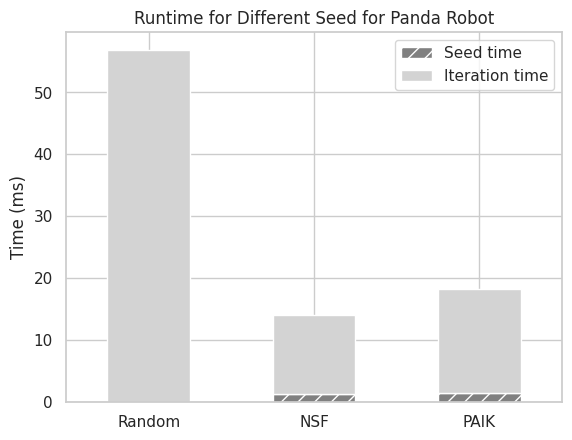

In [47]:
# the run_time is a combination of the seed time and the iteration time
# plot the run_time bar diagram with different color for seed time and iteration time for panda robot
# grab the information from df
import matplotlib.pyplot as plt
import seaborn as sns

df_panda = df[df["robot_name"] == "panda"]
df_panda = df_panda[["solver", "seed_time", "iteration_time"]]
df_panda = df_panda.round(2)

# Rename the solvers
df_panda['solver'] = df_panda['solver'].replace({
    'random': 'Random',
    'nsf': 'NSF',
    'paik': 'PAIK'
})

# plot the stacked bar diagram
# x_axis is the solver
# y_axis is the run_time
# the bar is stacked with seed_time and iteration_time

ax = df_panda.set_index("solver").plot(kind="bar", stacked=True, color=["gray", "#d3d3d3"])

# Add hatching to the seed_time bars
bars = ax.patches
hatch_pattern = '//'

for bar in bars[:len(df_panda)]:  # Apply hatch only to the seed_time bars
    bar.set_hatch(hatch_pattern)

# Set x-axis labels and rotation
ax.set_xticklabels(['Random', 'NSF', 'PAIK'], rotation=0)

# Remove the x-axis label
ax.set_xlabel('')

# Change the legend labels
ax.legend(labels=['Seed time', 'Iteration time'])

plt.ylabel("Time (ms)")
plt.title("Runtime for Different Seed for Panda Robot")

# Save the plot
plt.savefig(f"{config.record_dir}/runtime_panda_{num_poses}_{num_sols}.png")
plt.show()

In [7]:
# do the same for ikp   
from common.config import Config_IKP
import pandas as pd


robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

config = Config_IKP()
df_file_path = lambda robot_name: f"{config.record_dir}/ikp_{robot_name}_{config.num_poses}_{config.num_sols}_{config.std}.csv"

df = concatenate_all_dfs(robot_names, df_file_path)

# Reorder columns to swap mmd and solve_time_ms
df = df[['robot_name', 'solver', 'mmd', 'l2_mm', 'ang_deg', 'solve_time_ms']]

df.to_csv(f"{config.record_dir}/ikp_all_{config.num_poses}_{config.num_sols}_{config.std}.csv")
df

,robot_name,solver,mmd,l2_mm,ang_deg,solve_time_ms
0,panda,num,0.00,0.43,0.05,129.0
1,panda,ikflow,0.66,4.28,1.75,14.0
2,panda,nsf,0.46,3.23,1.75,18.0
3,panda,paik,0.34,4.20,2.40,18.0
4,fetch,num,0.00,0.34,0.05,37.0
5,fetch,ikflow,0.59,7.57,1.51,14.0
6,fetch,nsf,0.31,4.42,1.09,21.0
7,fetch,paik,0.26,7.18,1.85,21.0
8,fetch_arm,num,0.00,0.43,0.05,54.0
9,fetch_arm,ikflow,0.52,4.25,1.01,18.0
